Reference README.md for project proposal outline

# 2 Data Wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data Wrangling](#2_Data_Wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Metadata](#2.2.2_Metadata)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load the Vaccine Data](#2.5_Load_the_Vaccine_Data)
  * [2.6 Explore the Data](#2.6_Explore_the_Data)
    * [2.6.1 Isolate Missing Data](#2.6.1_Isolate_missing_data)
    * [2.6.2 Find the date-range of the data](#2.6.2_Find_the_date-range_of_the_data)
    * [2.6.3 Remove Duplicates](#2.6.3_Remove_Duplicates)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Calculate Cumulative Vaccination Totals](#2.6.4.1_Calculate_Cumulative_Vaccination_Totals)
      * [2.6.4.2 Distribution of Vaccine Totals by Country](#2.6.4.2_Distribution_of_Vaccine_Totals_by_Country)
      * [2.6.4.3 Calculate Ratios Based on Daily Vaccinations](#2.6.4.3_Calculate_Ratios_Based_on_Daily_Vaccinations)
    * [2.6.5 Categorical Features](#2.6.5_Categorical_Features)
      * [2.6.5.1 Unique Vaccines](#2.6.5.1_Unique_Vaccines)
        * [2.6.5.1.1 Covaxin Frequency](#2.6.5.1.1_Covaxin_Frequency)
        * [2.6.5.1.2 EpiVacCorona Frequency](#2.6.5.1.2_EpiVacCorona_Frequency)
        * [2.6.5.1.3 Johnson&Johnson Frequency](#2.6.5.1.3_Johnson&Johnson_Frequency)
        * [2.6.5.1.4 Maderna Frequency](#2.6.5.1.4_Maderna_Frequency)
        * [2.6.5.1.5 Oxford/AstraZeneca Frequency](#2.6.5.1.5_Oxford/AstraZeneca_Frequency)
        * [2.6.5.1.6 Pfizer/BioNTech Frequency](#2.6.5.1.6_Pfizer/BioNTech_Frequency)
        * [2.6.5.1.7 Sinopharm/Beijing Frequency](#2.6.5.1.7_Sinopharm/Beijing_Frequency)
        * [2.6.5.1.8 Sinopharm/Wuhan Frequency](#2.6.5.1.8_Sinopharm/Wuhan_Frequency)
        * [2.6.5.1.9 Sinovac Frequency](#2.6.5.1.9_Sinovac_Frequency)
        * [2.6.5.1.10 Sputnik V Frequency](#2.6.5.1.10_Sputnik_V_Frequency)
      * [2.6.5.2 Vaccines in Central America](#2.6.5.2_Vaccines_in_Central_America_Vaccinations)
    * [2.6.6 Combining the Categorical Data](#2.6.6_Combining_the_Categorical_Data)
      * [2.6.6.1 Selecting Country Regions](#2.6.6.1_Selecting_Country_Regions)
  * [2.7 Load the Covid Cases Data](#2.7_Load_the_Covid_Cases_Data)
  * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)


## 2.2 Introduction<a id='2.2_Introduction'></a>

In this notebook the data that is present will be defined and organized. There will be clear column labels and in effort to reduce the amount of computational errors the calculations will be verified and corrected if inaccurate. Any deletion and modification of the data will be summarized and the csv files that are generated from the cleaned data will be explained throughout this notebook.    

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to explore the effective strategies for distribution of the vaccine as the disease continues to spread. As billions of people around the world are waiting to be vaccinated, the shared responsibility to maintain a healthy environment rests on the shoulders of each individual. When the death toll from Covid19 was determined to be unstoppable there were many rules put in place. This shifted the focus of communities around the world to emphasize biosafety governance.  

Knowing very little about the data at this stage there are some questions that I would like answered:

    -Vaccine distribution by country 
    -Total number of vaccines that have been distributed
    -Confirmed cases, deaths
    -Population comparison and vaccine distribution 

Each country's medical infrastructure continues to play a vital role for everyone. In the rare instance of this pandemic the data that has been captured can result in a good approximation of how the current technologies advancements help reduce the time that it takes to control the spread of the disease. The health and status of each country is changing constantly and could never be understood fully when contemplating the epidemiology with reference to one disease. 

### 2.2.2 Metadata<a id='2.2.2_Metadata'></a>

Here is some important metadata for the imported datafiles: 

**COVID-19 World Vaccination Progress (country_vaccinations.csv)**
* Date Created: 2021-01-12
* Last Updated: 2021-03-02
* Download Date: 2021-03-02


**COVID cases by Continent (folder with csv files)**
* Date Created: 2020-04-08
* Last Updated: 2020-12-31
* Download Date: 2021-03-02

The information in this notebook will be treated as a living document and it is necessary to be reminded that this is historical data. Best practice will be followed to commit changes using Git version control. 

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

#This library was created by the author of DataScienceGuidedCapstone found in my GitHub repository
#It has been used in this notebook for the sole purpose of saving files
from library.sb_utils import save_file

## 2.4 Objectives<a id='2.4_Objectives'></a>

I believe the vaccine data and the covid cases will be sufficient to tackle the desired questions listed above. This is more of a documentation of the expanded program of immunization and how it compares to the public health records, rather than a business model. The target value that was identified in the project proposal was time dependent. The target suggests that there is potential for controlling the disease by 2022 and that people may go back to a normal way of life without masks, etc. There is some speculation about this, as well as skepticism, about the accuracy of predicting the eradication of a disease. There is far more information about the disease cases versus the vaccination. This is a fundamental difference that could not be corrected because this was a novel virus. The vaccines that were developed were barely approved within this dataset timespan. The information that is given for the vaccines could not be any greater. 

## 2.5 Load The Vaccine data <a id='2.5_Load_the_Vaccine_Data'></a>

In [2]:
#the supplied CSV file is in the raw_data directory and was uploaded from kaggle: 
#https://www.kaggle.com/gpreda/covid-world-vaccination-progress
vaccine_data = pd.read_csv('../raw_data/country_vaccinations.csv')
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4678 entries, 0 to 4677
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4678 non-null   object 
 1   iso_code                             4366 non-null   object 
 2   date                                 4678 non-null   object 
 3   total_vaccinations                   3054 non-null   float64
 4   people_vaccinated                    2595 non-null   float64
 5   people_fully_vaccinated              1746 non-null   float64
 6   daily_vaccinations_raw               2576 non-null   float64
 7   daily_vaccinations                   4518 non-null   float64
 8   total_vaccinations_per_hundred       3054 non-null   float64
 9   people_vaccinated_per_hundred        2595 non-null   float64
 10  people_fully_vaccinated_per_hundred  1746 non-null   float64
 11  daily_vaccinations_per_million

## 2.6 Explore The Data<a id='2.6_Explore_the_Data'></a>

At first glance, there are some missing values, the total number of rows is 4678. None of the columns containing datatypes have a complete set. The closest to a complete set for data, in decimals, is the daily vaccinations column. There is only one column that contains object data that is not complete and that is the iso_code column. 

In [3]:
vaccine_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


Looking a bit deeper, there are two columns that have daily vaccinations, one labeled daily vaccinations raw and the other daily vaccinations. This raises some questions about what exactly is being recorded. Referring back to kaggle-comments, might lead to better insight into which data to keep - the data column definition was given for the following:

'daily_vaccinations_raw: daily change in the total number of doses administered. 

It is only calculated for consecutive days. This is a raw measure provided for data checks and transparency, but we strongly recommend that any analysis on daily vaccination rates be conducted using daily_vaccinations instead.'

Upon further inspection it looks like there is a discrepancy between the total number of vaccinations (3) and daily vaccinations (7) and there are not values for each day. To get a better understanding about the cumulative totals for each country we can look at the values missing for those columns. In addition, to the iso code column, as this column contains categorical information for each data point.  

In [4]:
countries = pd.Series(vaccine_data.country.unique())
countries

0            Albania
1            Algeria
2            Andorra
3           Anguilla
4          Argentina
           ...      
113    United States
114          Uruguay
115        Venezuela
116            Wales
117         Zimbabwe
Length: 118, dtype: object

There are 195 countries in the world and there is data for 118 countries. That is missing data for 77 countries, nearly 40% of the world data is missing. 

### 2.6.1 Isolate missing data<a id='2.6.1_Isolate_missing_data'></a>

In [5]:
missing_vaccine = vaccine_data[['iso_code','people_vaccinated','daily_vaccinations']].isnull().sum()
p_missing = missing_vaccine/len(vaccine_data) * 100
p_missing

iso_code               6.669517
people_vaccinated     44.527576
daily_vaccinations     3.420265
dtype: float64

### 2.6.2 Find the date-range of the data<a id='2.6.2_Find_the_date-range_of_the_data'></a>

In [6]:
collect_end_date = vaccine_data.date.max()
collect_start_date = vaccine_data.date.min()

print('start date:', collect_start_date, '|    end date:', collect_end_date)

start date: 2020-12-08 |    end date: 2021-03-01


### 2.6.3 Remove duplicates<a id='2.6.3_Remove_duplicates'></a>

Majority of the missing values are in the people vaccinated column and not all of the iso codes have been populated. Some of the missing iso codes are for England and it was mentioned in the kaggle-comments that the UK data has doubled, they put data from each of their nation/countries (Wales, Scotland, Ireland, and England) AND from the UK itself. To address the duplication along with the missing values for the sovereign state before summing all of the vaccinations. I believe the simplest solution will be to remove the iso codes for the individual regions.

In [7]:
vaccine_data = vaccine_data.set_index('country')
n_vaccine_data = vaccine_data.drop(labels=['Wales','Scotland','Northern Ireland','England']).reset_index()
n_vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4366 non-null   object 
 1   iso_code                             4366 non-null   object 
 2   date                                 4366 non-null   object 
 3   total_vaccinations                   2840 non-null   float64
 4   people_vaccinated                    2381 non-null   float64
 5   people_fully_vaccinated              1544 non-null   float64
 6   daily_vaccinations_raw               2383 non-null   float64
 7   daily_vaccinations                   4210 non-null   float64
 8   total_vaccinations_per_hundred       2840 non-null   float64
 9   people_vaccinated_per_hundred        2381 non-null   float64
 10  people_fully_vaccinated_per_hundred  1544 non-null   float64
 11  daily_vaccinations_per_million

Now that the United Kingdom duplicated regions have been removed, the missing values for daily vaccinations can be removed and the vaccine values can be summed to populate an accurate cumulative total for total vaccinations based on the daily vaccinations column. 

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

#### 2.6.4.1 Calculate Cumulative Vaccination Totals<a id='2.6.4.1_Calculate_Cumulative_Vaccination_Totals'></a>

In [8]:
missing_vaccine_data = n_vaccine_data.dropna(subset=['daily_vaccinations'], inplace=True)
n_vaccine_data['total_vaccinations'] = n_vaccine_data.groupby('iso_code').daily_vaccinations.cumsum()
n_vaccine_data.head(50)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,Albania,ALB,2021-01-11,64.0,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,191.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,257.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
5,Albania,ALB,2021-01-15,319.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
6,Albania,ALB,2021-01-16,381.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
7,Albania,ALB,2021-01-17,439.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
8,Albania,ALB,2021-01-18,494.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
9,Albania,ALB,2021-01-19,545.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
10,Albania,ALB,2021-01-20,592.0,519.0,NaN,36.0,47.0,0.02,0.02,NaN,16.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


All null values for daily vaccinations are gone, around 160 rows, and running total has been calculated per each iso code. Comparing the total vaccinations column with the people vaccinated, there are values which are misaligned, and as we saw earlier, almost half of the data is missing from the people vaccinated column. From my understanding about the data this duplication of columns would lead to more questions than answers. Also, as mentioned before the daily vaccinations raw - was simply for data checks and transparency, most of the computation will be based off of daily vaccinations. Therefore, three columns will be removed: people vaccinated, people vaccinated per hundred and daily vaccination raw. 

In [9]:
p_vaccine_data = n_vaccine_data.drop(columns=['people_vaccinated','daily_vaccinations_raw','people_vaccinated_per_hundred'])
p_vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 1 to 4365
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4210 non-null   object 
 1   iso_code                             4210 non-null   object 
 2   date                                 4210 non-null   object 
 3   total_vaccinations                   4210 non-null   float64
 4   people_fully_vaccinated              1538 non-null   float64
 5   daily_vaccinations                   4210 non-null   float64
 6   total_vaccinations_per_hundred       2713 non-null   float64
 7   people_fully_vaccinated_per_hundred  1538 non-null   float64
 8   daily_vaccinations_per_million       4210 non-null   float64
 9   vaccines                             4210 non-null   object 
 10  source_name                          4210 non-null   object 
 11  source_website                

A graphical representation of the miximums from the total vaccinations per country will show us how frequently the number passes one million. This will be a deciding point on whether to keep that column or remove it.

#### 2.6.4.2 Distribution of Vaccine Totals by Country<a id='2.6.4.2_Distribution_of_Vaccine_Totals_by_Country'></a>

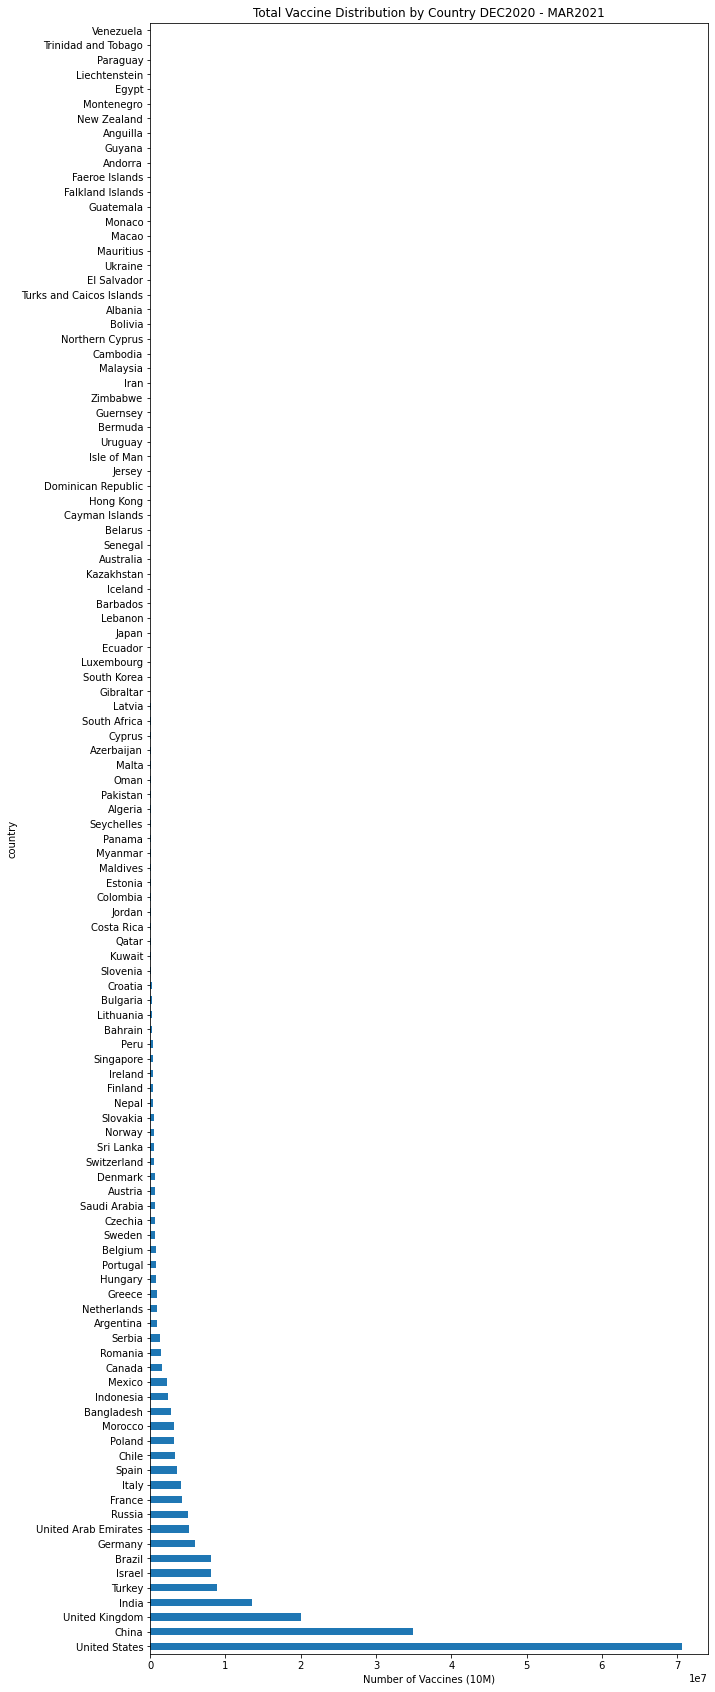

In [10]:
vaccine_max = p_vaccine_data.groupby('country')['total_vaccinations'].max()
vaccine_max
vaccine_max.sort_values(ascending=False).plot(kind='barh', figsize=(10, 30), title='Total Vaccine Distribution by Country DEC2020 - MAR2021')
plt.xlabel('Number of Vaccines (10M)');

In [11]:
more_than_mil = vaccine_max > 1000000
more_than_mil.value_counts()

False    89
True     22
Name: total_vaccinations, dtype: int64

In [12]:
all_rows = p_vaccine_data.total_vaccinations > 1000000
all_rows.value_counts()

False    3471
True      739
Name: total_vaccinations, dtype: int64

Out of the 118 countries that are listed 22 have vaccines counts that are greater than one million. It is a very optimistic outlook, given the fact that this is for a 3 month period, the other 89 cumulative calculated values would be less than one or smaller. That is to say 21% of the data will be greater than one. The daily vaccinations per million column can be removed a new values for the total vaccinations per hundred can be calculated based on the numbers that were calculated earlier for total number of vaccinations.

#### 2.6.4.3 Calculate Ratios Based on Daily Vaccinations<a id='2.6.4.3_Calculate_Ratios_Based_on_Daily_Vaccinations'></a>

In [13]:
p_vaccine_data = p_vaccine_data.drop(columns=['daily_vaccinations_per_million'])
p_vaccine_data['total_vaccinations_per_hundred'] = p_vaccine_data['total_vaccinations'] / 100
p_vaccine_data['people_fully_vaccinated_per_hundred'] = p_vaccine_data['people_fully_vaccinated'] / 100
p_vaccine_data[['people_fully_vaccinated','people_fully_vaccinated_per_hundred']] = p_vaccine_data[['people_fully_vaccinated','people_fully_vaccinated_per_hundred']].fillna(0)
pop_v = p_vaccine_data.reset_index().drop(columns='index')
pop_v.head()

,country,iso_code,date,total_vaccinations,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred,vaccines,source_name,source_website
0,Albania,ALB,2021-01-11,64.0,0.0,64.0,0.64,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-12,128.0,0.0,64.0,1.28,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-13,191.0,0.0,63.0,1.91,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-14,257.0,0.0,66.0,2.57,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-15,319.0,0.0,62.0,3.19,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


### 2.6.5 Categorical Features<a id='2.6.5_Categorical_Features'></a>

There is now a complete numeric data set. There are multiple vaccines that are listed in each column. To determine the distribution of each vaccine the column strings must be split into individual columns. Visualizing the data by vaccine will be easier if the vaccines are split up into separate columns.

#### 2.6.5.1 Unique Vaccines<a id='2.6.5.1_Unique_Vaccines'></a>

In [14]:
#Getting unique vaccine from the vaccine column
vac_type = p_vaccine_data["vaccines"].str.split(",").explode("vaccines").unique()
vac_type_list = [x.replace(" ", '') for x in vac_type]
vac_pd = pd.DataFrame(vac_type_list).rename(columns={0:'vaccine'}).drop(index=[4,5,6,9,11]).sort_values('vaccine').reset_index()
vac_pd.drop(columns='index')

,vaccine
0,Covaxin
1,EpiVacCorona
2,Johnson&Johnson
3,Moderna
4,Oxford/AstraZeneca
5,Pfizer/BioNTech
6,Sinopharm/Beijing
7,Sinopharm/Wuhan
8,Sinovac
9,SputnikV


This is the complete set of unique vaccines and can be used to determine the total frequency each vaccine is listed in this dataset. This number can be used as a factor of total vaccines distributed per country.  

##### 2.6.5.1.1 Covaxin Frequency<a id='2.6.5.1.1_Covaxin_Frequency'></a>

In [15]:
def get_vac(vac_str):
    cov_data = p_vaccine_data["vaccines"].str.split(',', expand=True)
    cov = cov_data.values == vac_str
    cov_df = pd.DataFrame(cov)
    c_df = cov_df.replace({True:vac_str, False:''})
    return c_df

#Covaxin
c_df = get_vac('Covaxin')
c_df.describe()

#Covaxin (44/4210) was administered to India with reference to the raw data - will need to verify that after the concatonation

,0,1,2,3,4
count,4210,4210,4210,4210,4210
unique,2,1,1,1,1
top,,,,,
freq,4166,4210,4210,4210,4210


##### 2.6.5.1.2  EpiVacCorona Frequency<a id='2.6.5.1.1_EpiVacCorona_Frequency'></a>

In [16]:
#EpiVacCorona
e_df = get_vac('EpiVacCorona')
e_df.describe()

#EpiVacCorona (76/4210) is a Russian vaccination

,0,1,2,3,4
count,4210,4210,4210,4210,4210
unique,2,1,1,1,1
top,,,,,
freq,4134,4210,4210,4210,4210


##### 2.6.5.1.3 Johnson&Johnson Frequency<a id='2.6.5.1.3_Johnson&Johnson_Frequency'></a>

In [17]:
#Johnson&Johnson
jnj_df = get_vac('Johnson&Johnson')
jnj_df.describe()

#Johnson&Johnson (12/4210) is a South Afrian vaccination

,0,1,2,3,4
count,4210,4210,4210,4210,4210
unique,2,1,1,1,1
top,,,,,
freq,4198,4210,4210,4210,4210


##### 2.6.5.1.4 Maderna Frequency<a id='2.6.5.1.4_Maderna_Frequency'></a>

In [18]:
#Moderna
m_df = get_vac('Moderna')
m_df.describe()

#Moderna (1644/4210) was administered to Austria, Belgium, Bulgaria, Canada, Czechia, Denmark, Estonia, Finland, France, Germany, Greece,
#Hungary, Iceland, Ireland, Israel, Italy, Latvia, Liechtenstein, Lithuania, Luxembourg, Netherlands, Norway, Poland, 
#Portugal, Romania, Spain, Switzerland, US

,0,1,2,3,4
count,4210,4210,4210,4210,4210
unique,2,1,1,1,1
top,,,,,
freq,2566,4210,4210,4210,4210


##### 2.6.5.1.5 Oxford/AstraZeneca Frequency<a id='2.6.5.1.5_Oxford/AstraZeneca_Frequency'></a>

In [19]:
#'Oxford/AstraZeneca'

def combine_series(s1, s2, vaccine):
    not_None = lambda s1, s2: s1 if s1 == vaccine else s2
    s = s1.combine(s2, not_None)
    return s

oxas_df = get_vac('Oxford/AstraZeneca')
oxas_df.describe()
oxas_df2 = get_vac(' Oxford/AstraZeneca')
oxas_df2.describe()

#Combining the Oxford/AstraZeneca data from two to one column
oxas_s = combine_series(oxas_df[0], oxas_df2[1], 'Oxford/AstraZeneca').str.lstrip(' ?')
oxas_s.describe()
#Oxford/AstraZeneca (2271/4210) was administered to Anguilla, Austria, Azerbaijan, Bahrain, Bangladesh, Barbados, Belgium, Brazil, 
#Bulgaria, Czechia, Dominican Republic, El Salvador, England, Estonia, Falkland Islands, Finland, France, Germany, Greece
#Guyana, Hungary, Iceland, India, Ireland, Isle of Man, Italy, Jersey, Latvia, Lithuania, Luxembourg, Maldives, Mauritius, 
#Mexico, Morocco, Myanmar, Nepal, Netherlands, Northern Ireland, Norway, Oman, Pakistan, Poland, Qatar, Romania, Saint Helena, 
#Saudi Arabia, Scotland, Seychelles, Slovenia, South Korea, Spain, Sri Lanka, Sweden, Trinidad and Tobago, Ukraine, 
#United Arab Emirates, UK, Wales 

count                   4210
unique                     2
top       Oxford/AstraZeneca
freq                    2271
dtype: object

##### 2.6.5.1.6 Pfizer/BioNTech Frequency<a id='2.6.5.1.6_Pfizer/BioNTech_Frequency'></a>

In [20]:
#'Pfizer/BioNTech'
pfiz_df = get_vac('Pfizer/BioNTech')
pfiz_df.describe()
pfiz_df2 = get_vac(' Pfizer/BioNTech')
pfiz_df2.describe()

#Combining the Pfizer/BioNTech data from three to one column
pre_pfiz_s = combine_series(pfiz_df2[1], pfiz_df2[2], ' Pfizer/BioNTech')
pfiz_s = combine_series(pfiz_df[0], pre_pfiz_s, 'Pfizer/BioNTech').str.lstrip(' ?')
pfiz_s.describe()

#Pfizer/BioNTech (3270/4210) was administered to Albania, Andorra, Australia, Austria, Bahrain, Belgium, Bermuda,Bulgaria, 
#Canada, Cayman Islands, Chile, Colombia, Costa Rica, Croatia, Cyprus, Czechia, Ecuador, England, Estonia, Faeroe Islands,
#Finland, France, Germany, Gibraltar, Greece, Greenland, Guernsey, Hong Kong, Hungary, Iceland, Ireland, Isle of Man, 
#Israel, Italy, Japan, Jersey, Jordan, Kuwait, Latvia, Lebanon, Liechtenstein, Lithuania, Luxembourg, Malta, Mexico, 
#Monaco, Netherlands, New Zealand, Northern Ireland, Norway, Oman, Panama, Poland, Portugal, Qatar, Romania, Saudi Arabia, 
#Scotland, Serbia, Singapore, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turks and Caicos Islands, United Arab Emirates,
#UK, US, Wales 

count                4210
unique                  2
top       Pfizer/BioNTech
freq                 3270
dtype: object

##### 2.6.5.1.7 Sinopharm/Beijing Frequency<a id='2.6.5.1.7_Sinopharm/Beijing_Frequency'></a>

In [21]:
#'Sinopharm/Beijing'
sbe_df = get_vac('Sinopharm/Beijing')
sbe_df.describe()
sbe_df2 = get_vac(' Sinopharm/Beijing')
sbe_df2.describe()

#Combining the Sinopharm/Beijing data from four to one column
c3n2_sbe_s = combine_series(sbe_df2[3], sbe_df2[2], ' Sinopharm/Beijing')
c3n2n1_sbe_s = combine_series(c3n2_sbe_s, sbe_df2[1], ' Sinopharm/Beijing')
sbe_s = combine_series(sbe_df[0], c3n2n1_sbe_s, 'Sinopharm/Beijing').str.lstrip(' ?')
sbe_s.describe()

#Sinopharm/Beijing (502/4210) was administered to Bahrain, Cambodia, China, Egypt, Hungary, Jordan, Macao, Morocco, Pakistan, Peru, 
#Senegal, Serbia, Seychelles, United Arab Emirates, Zimbabwe

count     4210
unique       2
top           
freq      3708
dtype: object

##### 2.6.5.1.8 Sinopharm/Wuhan Frequency<a id='2.6.5.1.8_Sinopharm/Wuhan_Frequency'></a>

In [22]:
#'Sinopharm/Wuhan'
swu_df = get_vac(' Sinopharm/Wuhan')
swu_df.describe()

#Combining the Sinopharm/Wuhan data from two to one column
swu_s = combine_series(swu_df[1], swu_df[3], ' Sinopharm/Wuhan')
swu_s.describe()

#Sinopharm/Wuhan (111/4210) was administered to China and United Arab Emirates 

count     4210
unique       2
top           
freq      4099
dtype: object

##### 2.6.5.1.9 Sinovac Frequency<a id='2.6.5.1.9_Sinovac_Frequency'></a>

In [23]:
#'Sinovac'
sin_df = get_vac('Sinovac')
sin_df.describe()
sin_df2 = get_vac(' Sinovac')
sin_df2.describe()

#Combining the Sinovac data from three to one column
pre_sin_s = combine_series(sin_df2[2], sin_df2[1], ' Sinovac')
sin_s = combine_series(sin_df[0], pre_sin_s, 'Sinovac').str.lstrip(' ?')
sin_s.describe()

#Sinovac (284/4210) was administered to Brazil, Chile, China, Guatemala, Hong Kong, Indnesia, Malaysia, Northern Cyprus, Turkey, 
#Uruguay  

count     4210
unique       2
top           
freq      3926
dtype: object

##### 2.6.5.1.10 Sputnik V Frequency<a id='2.6.5.1.10_Sputnik_V_Frequency'></a>

In [24]:
#'Sputnik V'
sput_df = get_vac('Sputnik V')
sput_df.describe()
sput_df2 = get_vac(' Sputnik V')
sput_df2.describe()

#Combining the SputnikV data from four to one column
c4n3_sput_s = combine_series(sput_df2[4], sput_df2[3], ' Sputnik V')
c2n1_sputs_s = combine_series(sput_df2[2], sput_df2[1], ' Sputnik V')
c4n3n2n1_sputs_s = combine_series(c4n3_sput_s, c2n1_sputs_s, ' Sputnik V')
sput_s = combine_series(sput_df[0], c4n3n2n1_sputs_s, 'Sputnik V').str.lstrip(' ?')
sput_s.describe()

#SputnikV (616/4210) was administered to Algeria, Argentina, Azerbaijan, Bahrain, Belarus, Bolivia, Hungary, Iran, Kazakhstan, Mexico,
#Montenegro, Pakistan, Paraguay, Russia, San Marino, Serbia, United Arab Emirates, Venezuala

count     4210
unique       2
top           
freq      3594
dtype: object

#### 2.6.5.2 Vaccines in Central America<a id='2.6.5.2_Vaccines_in_Central_America'></a>

In [25]:
central_america_df = pd.concat([p_vaccine_data.loc[p_vaccine_data['country'] == 'El Salvador'],
                                 p_vaccine_data.loc[p_vaccine_data['country'] == 'Costa Rica'],
                                 p_vaccine_data.loc[p_vaccine_data['country'] == 'Guatemala'],
                                 p_vaccine_data.loc[p_vaccine_data['country'] == 'Panama']])
central_america_df.groupby('country')['vaccines'].unique()

#Belize, Honduras, Nicaragua not present in data set

country
Costa Rica        [Pfizer/BioNTech]
El Salvador    [Oxford/AstraZeneca]
Guatemala                 [Sinovac]
Panama            [Pfizer/BioNTech]
Name: vaccines, dtype: object

Here is a list of vaccines that have been given to the Central American population, three of the countries that are not present for this continent can be accounted for in the total missing data for countries (3/77).

### 2.6.6 Combining the Categorical Data<a id='2.6.6_Combining_the_Categorical_Data'></a>

In [26]:
#Creating a dictionary of series to ensure values are not altered
v_dict = {'Covaxin':c_df[0], 
          'EpiVacCorona':e_df[0], 
          'Johnson&Johnson':jnj_df[0], 
          'Moderna':m_df[0], 
          'Oxford/AstraZeneca':oxas_s,
          'Pfizer/BioNTech':pfiz_s,
          'Sinopharm/Beijing':sbe_s,
          'Sinopharm/Wuhan':swu_s,
          'Sinovac':sin_s,
          'Sputnik V':sput_s
         }

#Creating a dataframe with the complete vaccine series one column per vaccine
vtype_df = pd.DataFrame(data=v_dict)
vtype_df.head()

,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V
0,,,,,,Pfizer/BioNTech,,,,
1,,,,,,Pfizer/BioNTech,,,,
2,,,,,,Pfizer/BioNTech,,,,
3,,,,,,Pfizer/BioNTech,,,,
4,,,,,,Pfizer/BioNTech,,,,


In [27]:
#Generating one dataframe with country/count/vaccine type by column 
vp_df = pd.concat([pop_v, vtype_df], axis=1)
vp_df

,country,iso_code,date,total_vaccinations,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred,vaccines,source_name,...,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V
0,Albania,ALB,2021-01-11,64.0,0.0,64.0,0.64,0.0,Pfizer/BioNTech,Ministry of Health,...,,,,,,Pfizer/BioNTech,,,,
1,Albania,ALB,2021-01-12,128.0,0.0,64.0,1.28,0.0,Pfizer/BioNTech,Ministry of Health,...,,,,,,Pfizer/BioNTech,,,,
2,Albania,ALB,2021-01-13,191.0,0.0,63.0,1.91,0.0,Pfizer/BioNTech,Ministry of Health,...,,,,,,Pfizer/BioNTech,,,,
3,Albania,ALB,2021-01-14,257.0,0.0,66.0,2.57,0.0,Pfizer/BioNTech,Ministry of Health,...,,,,,,Pfizer/BioNTech,,,,
4,Albania,ALB,2021-01-15,319.0,0.0,62.0,3.19,0.0,Pfizer/BioNTech,Ministry of Health,...,,,,,,Pfizer/BioNTech,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,Zimbabwe,ZWE,2021-02-25,5004.0,0.0,1572.0,50.04,0.0,Sinopharm/Beijing,Ministry of Health,...,,,,,,,Sinopharm/Beijing,,,
4206,Zimbabwe,ZWE,2021-02-26,6754.0,0.0,1750.0,67.54,0.0,Sinopharm/Beijing,Ministry of Health,...,,,,,,,Sinopharm/Beijing,,,
4207,Zimbabwe,ZWE,2021-02-27,8904.0,0.0,2150.0,89.04,0.0,Sinopharm/Beijing,Ministry of Health,...,,,,,,,Sinopharm/Beijing,,,
4208,Zimbabwe,ZWE,2021-02-28,11455.0,0.0,2551.0,114.55,0.0,Sinopharm/Beijing,Ministry of Health,...,,,,,,,Sinopharm/Beijing,,,


#### 2.6.6.1 Selecting Country Regions<a id='2.6.6.1_Selecting_Country_Regions'></a>

The country regions were selected because they had the most vaccine distribution, I believe this is a result of population prevalence. 

In [28]:
def grab_countries(df, c_list):#c_list can be 1 or 0 to determine if a list or dataframe is returned

    can_df = df.loc[df['country'] == 'Canada']
    mex_df = df.loc[df['country'] == 'Mexico']
    ind_df = df.loc[df['country'] == 'Indonesia']
    bgd_df = df.loc[df['country'] == 'Bangladesh']
    mar_df = df.loc[df['country'] == 'Morocco']
    pol_df = df.loc[df['country'] == 'Poland']
    chl_df = df.loc[df['country'] == 'Chile']
    esp_df = df.loc[df['country'] == 'Spain']
    ity_df = df.loc[df['country'] == 'Italy']
    fra_df = df.loc[df['country'] == 'France']
    rus_df = df.loc[df['country'] == 'Russia']
    are_df = df.loc[df['country'] == 'United Arab Emirates']
    deu_df = df.loc[df['country'] == 'Germany']
    bra_df = df.loc[df['country'] == 'Brazil']
    isr_df = df.loc[df['country'] == 'Israel']
    tur_df = df.loc[df['country'] == 'Turkey']
    indi_df = df.loc[df['country'] == 'India']
    gbr_df = df.loc[df['country'] == 'United Kingdom']
    chn_df = df.loc[df['country'] == 'China']
    usa_df = df.loc[df['country'] == 'United States']

    df_list = [can_df, mex_df, ind_df, bgd_df, mar_df, pol_df, chl_df, esp_df, ity_df, fra_df, 
               rus_df, are_df, deu_df, bra_df, isr_df, tur_df, indi_df, gbr_df, chn_df, usa_df] 

    smaller_frame = pd.concat(df_list, ignore_index=True).reset_index().drop(columns='index')
    
    if c_list == 0:
        return smaller_frame
    if c_list == 1:
        return df_list
    

sorted_vdf = grab_countries(vp_df, 0)
sorted_vdf['date'] = pd.to_datetime(sorted_vdf['date'],format='%Y-%m-%d')

sorted_vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              1142 non-null   object        
 1   iso_code                             1142 non-null   object        
 2   date                                 1142 non-null   datetime64[ns]
 3   total_vaccinations                   1142 non-null   float64       
 4   people_fully_vaccinated              1142 non-null   float64       
 5   daily_vaccinations                   1142 non-null   float64       
 6   total_vaccinations_per_hundred       1142 non-null   float64       
 7   people_fully_vaccinated_per_hundred  1142 non-null   float64       
 8   vaccines                             1142 non-null   object        
 9   source_name                          1142 non-null   object        
 10  source_websi

### 2.6.7 Vaccine Entries by Country<a id='2.6.7_Vaccine_Entries_by_Country'></a>

In [29]:
def vaccine_count(vaccine_pair):
    num = 0
    for x in vaccine_pair:
        if len(x) != 0:
            num = num + 1
        else:
            num = 0
    return num


def country_vac_pair(c_list,v_list):
    vbc = []
    vacs_per_c = []
    for i in c_list:
        for j in v_list:
            num = vaccine_count(i[j])
            country = i.country.unique()
            vaccine = j
            vacs_per_c = [str(country).strip('[]'), vaccine, num] 
            vbc.append(vacs_per_c)
    
    return vbc


vac_list = ['Covaxin','EpiVacCorona','Johnson&Johnson','Moderna','Oxford/AstraZeneca', 
            'Pfizer/BioNTech', 'Sinopharm/Beijing','Sinopharm/Wuhan','Sinovac','Sputnik V']
country_list = grab_countries(sorted_vdf, 1)

vcount_df = pd.DataFrame(country_vac_pair(country_list, vac_list), columns = ['country', 'vaccine', 'count'])
vcount_df['country'] = vcount_df['country'].str.replace("'", '')
vcount_df.groupby('country')['count'].sum()

country
Bangladesh               33
Brazil                   88
Canada                   96
Chile                   132
China                   168
France                  189
Germany                 192
India                    88
Indonesia                47
Israel                  144
Italy                   192
Mexico                  201
Morocco                  60
Poland                  189
Russia                  152
Spain                   165
Turkey                   47
United Arab Emirates    275
United Kingdom          154
United States           142
Name: count, dtype: int64

The totals above include a summation of multiple types of vaccines per country. The graph below is a count of single vaccine distributed to multiple countries.

Text(0.5, 1.0, 'Distribution of Vaccines by Country')

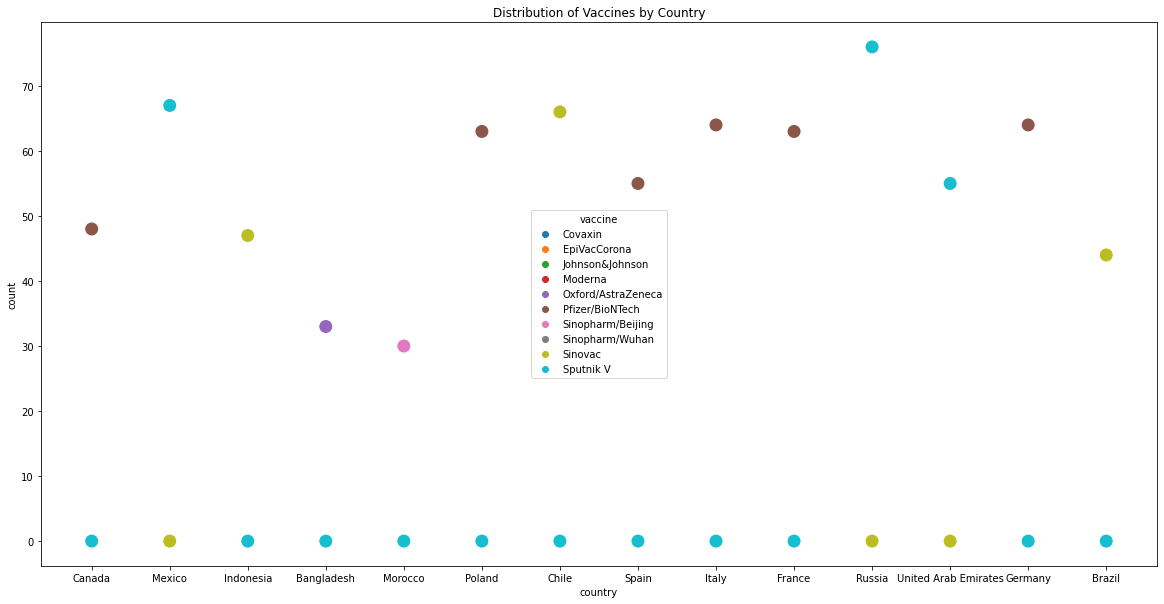

In [30]:
#The numbers above and in the graph are relative to the number of times the vaccine was entered per country row. 
#They are not an indication of acutal vaccine counts
df = vcount_df.iloc[:140,:]
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=df['country'], y=df['count'], hue='vaccine', data=df, markers=True, s=200, marker="o").set_title('Distribution of Vaccines by Country')

This is a graph that does not include the US, UK, China, India, Turkey and Israel, we can see from this subsection of countries paired with vaccines that the number of entries per vaccine (Sputnik V) was the highest for Russia. The most common vaccine is Pfizer which was distributed in Germany, France, Italy, Spain, Poland, and Canada. The next vaccine is Sinovac and it was given to Brazil, Chile and Indonesia. The least documented vaccine was Sinopharm/Beijing, found in Morocco. Of the total 10 vaccines only half can be found in this sample population (Sputnik V, Pfizer/BioNTech, Sinovac, Oxford/AstraZeneca, Sinopharm/Beijing).

## 2.7 Load the Covid Cases Data<a id='2.7_Load_the_Covid_Cases_Data'></a>

In [42]:
#the supplied CSV file is in the raw_data directory and was uploaded from kaggle: 
#https://www.kaggle.com/okwirjulius/covid19-cases-in-africa 
#Not all of the files that were downloaded will be used for this study, the following files were not included: 
#covid19_oceania.csv, covid19_others.csv, covid19_world.csv, and covid19_tests.csv

# get data file names
path =r'..\raw_data\covid_case_files'
filenames = glob.glob(path + "/*.csv")
def concat_dfs(filnames):
    dfs = []
    for filename in filenames:
        dfs.append(pd.read_csv(filename))
    la_frame = pd.concat(dfs, ignore_index=True)
    
    return la_frame

# Concatenate all data into one DataFrame
big_frame = concat_dfs(filenames)

#Update column names 
rec_cases = big_frame.rename(columns={'ObservationDate':'date','Country_Region':'country'})
rec_cases = rec_cases.drop(columns=['Province_State'])
rec_cases.columns = rec_cases.columns.str.lower()
rec_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038272 entries, 0 to 1038271
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   date       1038272 non-null  object 
 1   country    1038272 non-null  object 
 2   confirmed  1038272 non-null  int64  
 3   deaths     1038271 non-null  float64
 4   recovered  1038270 non-null  float64
 5   active     1037789 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 47.5+ MB


There are more than a million rows of data in the covid cases dataset. There are a few null values in deaths and recovered and 481 null values in the active cases column. To better understand the missing country data, the number of countries can be compared to the the total number of countries in the world, before isolating the 20 countries of interest. 

In [100]:
c_in_case_data = pd.Series(rec_cases.country.unique())
c_in_case_data.iloc[:50]

0                    China
1                Hong Kong
2                    Macau
3                   Taiwan
4                    Japan
5                 Thailand
6              South Korea
7                Singapore
8              Philippines
9                 Malaysia
10                 Vietnam
11                   Nepal
12                Cambodia
13               Sri Lanka
14    United Arab Emirates
15                   India
16                    Iran
17                  Israel
18                 Lebanon
19                    Iraq
20                    Oman
21             Afghanistan
22                 Bahrain
23                  Kuwait
24                Pakistan
25                 Georgia
26              Azerbaijan
27                   Qatar
28                 Armenia
29               Indonesia
30            Saudi Arabia
31                  Jordan
32      West Bank and Gaza
33                  Bhutan
34                Maldives
35              Bangladesh
36                  Cyprus
3

In [101]:
c_in_case_data.iloc[50:100]

50                   Germany
51                   Finland
52                     Italy
53            United Kingdom
54                    Russia
55                    Sweden
56                     Spain
57                   Belgium
58                   Austria
59                   Croatia
60               Switzerland
61                    Greece
62           North Macedonia
63                    Norway
64                   Romania
65                   Denmark
66                   Estonia
67               Netherlands
68                San Marino
69                   Belarus
70                   Iceland
71                 Lithuania
72                   Ireland
73                Luxembourg
74                    Monaco
75                   Czechia
76                  Portugal
77                   Andorra
78                    Latvia
79                   Ukraine
80                   Hungary
81             Liechtenstein
82                    Poland
83    Bosnia and Herzegovina
84            

In [102]:
c_in_case_data.iloc[100:]

100                            Colombia
101                             Ecuador
102                  Dominican Republic
103                           Argentina
104                               Chile
105                    Saint Barthelemy
106                          Costa Rica
107                                Peru
108                       French Guiana
109                          Martinique
110                            Paraguay
111                              Panama
112                             Bolivia
113                            Honduras
114                             Jamaica
115                                Cuba
116                          Guadeloupe
117                 Antigua and Barbuda
118                              Guyana
119                             Uruguay
120                 Trinidad and Tobago
121                           Venezuela
122                           Guatemala
123                         Saint Lucia
124    Saint Vincent and the Grenadines


There are 135 different rows for the countries and that is not including Africa. There are some countries that have been counted together: Bosnia and Herzegovina, Antigua and Barbuda, Trinidad and Tobago, Saint Vincent and the Grenadines, & Saint Kitts and Nevis. That is a total of 150 countries. The African dataset had to be handled a bit differently because the column names were different than the files for Asia, Europe, North America, and South America. These are the csv files that were concatenated above. 

In [44]:
#Load dataframe and update column names 
africa_df = pd.read_csv('../raw_data/covid19_africa.csv')
africa_df = africa_df.rename(columns={'ObservationDate':'date'}).drop(columns=['Region'])
africa_df.columns = africa_df.columns.str.lower()

In [45]:
af_case_data = pd.Series(africa_df.country.unique())
af_case_data

0                  Ivory Coast
1                        Egypt
2                      Algeria
3                      Nigeria
4                      Morocco
5                      Senegal
6                      Tunisia
7                 South Africa
8                     Cameroon
9                         Togo
10                Burkina Faso
11            Congo (Kinshasa)
12                    Ethiopia
13                       Sudan
14                      Guinea
15                       Kenya
16                       Ghana
17                     Namibia
18                  Seychelles
19                    Eswatini
20                       Gabon
21                  Mauritania
22                      Rwanda
23    Central African Republic
24         Congo (Brazzaville)
25           Equatorial Guinea
26                       Benin
27                     Liberia
28                     Somalia
29                    Tanzania
30                   Mauritius
31                      Zambia
32      

There are 54 countries in the African data, that is all the countries in Africa! The total number of countries is 194, this is extremely close to 100% representation of the entire world population.

In [51]:
#Concatonating africa data with the other countries 
covid_cases = pd.concat([africa_df, rec_cases], axis=0)

#Updating the date datatype
covid_cases['date'] = pd.to_datetime(covid_cases['date'],format='%Y-%m-%d')

#Grouping by the date and including the countries
grouped_cases = covid_cases.groupby([covid_cases['date'].dt.date, 'country']).agg('sum')
grouped_cases = grouped_cases.sort_values(['country','date']).reset_index()
grouped_cases['date'] = pd.to_datetime(grouped_cases['date'],format='%Y-%m-%d')
grouped_cases.head(500)

,date,country,confirmed,deaths,recovered,active
0,2020-02-24,Afghanistan,13,0.0,0.0,13.0
1,2020-03-08,Afghanistan,8,0.0,0.0,8.0
2,2020-03-10,Afghanistan,5,0.0,0.0,5.0
3,2020-03-11,Afghanistan,21,0.0,0.0,21.0
4,2020-03-14,Afghanistan,11,0.0,0.0,11.0
...,...,...,...,...,...,...
495,2020-10-03,Albania,14117,392.0,8536.0,5189.0
496,2020-10-04,Albania,14266,396.0,8675.0,5195.0
497,2020-10-05,Albania,14410,400.0,8825.0,5185.0
498,2020-10-06,Albania,14568,403.0,8965.0,5200.0


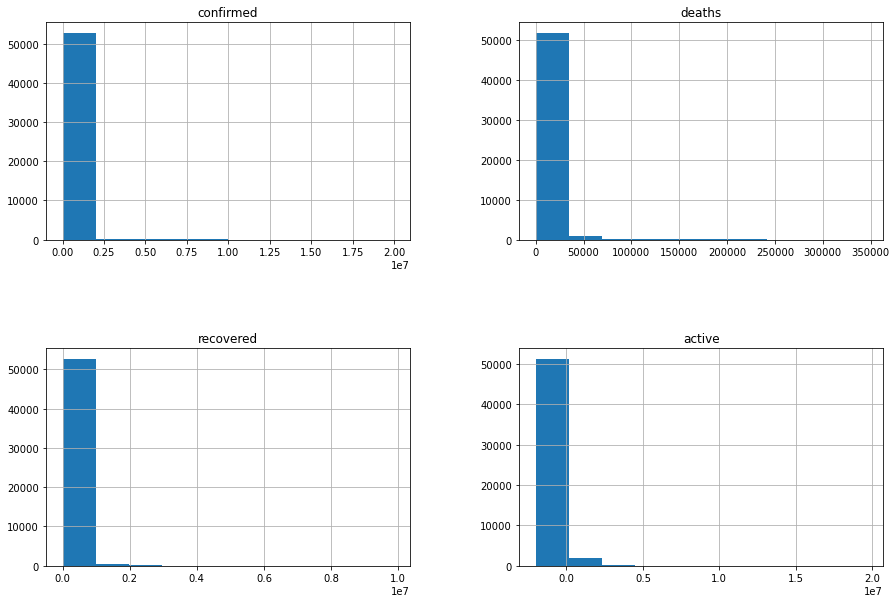

In [52]:
grouped_cases.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

There is cause for some concern when looking at the data. Most of it is clustered around the low end. It is important to know that the identity of the disease was first established in Wuhan and after it spread to other regions, changing the classification from an endemic to a pandemic. These values identified here are in countries that did not experience exposure until later in the year. Grouping the data with respect to country and date may lessen the total number of 0 values and a different height can be created summing the number of confirmed, deaths, recovered, and active based on months.

In [97]:
data_by_mo = grouped_cases.groupby([grouped_cases.date.dt.year, 
                                    grouped_cases.date.dt.month, 'country'])[['confirmed','deaths','recovered','active']].sum()
data_by_mo.iloc[1350:1400]

confirmed     deaths    recovered  \
date date country                                                       
2020 9    US                        185353907  5482023.0   70197080.0   
          Uganda                       148846     1546.0      68770.0   
          Ukraine                     4649277    94494.0    2108464.0   
          United Arab Emirates        2277562    11193.0    2000242.0   
          United Kingdom             10746215  1170699.0      57710.0   
          Uruguay                       51213     1279.0      43902.0   
          Uzbekistan                  1364704    11165.0    1274780.0   
          Venezuela                   1734441    14134.0    1433509.0   
          Vietnam                       29757      978.0      25389.0   
          West Bank and Gaza           893997     6444.0     616060.0   
          Yemen                         56280    16266.0      34202.0   
          Zambia                       382383     8822.0     354683.0   
          Zimbabwe                     208179     6165.0     160594.0   
     10   Afghanistan                 1245921    46225.0    1039280.0   
          Albania                      523084    13731.0     305370.0   
          Algeria                     1683631    57192.0    1177057.0   
          Andorra                      103067     1895.0      69118.0   
          Angola                       233349     7325.0      94176.0   
          Antigua and Barbuda            3586       93.0       3163.0   
          Argentina                  29922509   795200.0   24249610.0   
          Armenia                     2012415    33744.0    1490885.0   
          Austria                     2039236    28062.0    1521700.0   
          Azerbaijan                  1403733    19697.0    1242714.0   
          Bahamas                      170339     3612.0     100515.0   
          Bahrain                     2388821     8985.0    2262718.0   
          Bangladesh                 11965030   174118.0    9323916.0   
          Barbados                       6692      217.0       6093.0   
          Belarus                     2701983    28380.0    2464735.0   
          Belgium                     7034572   324841.0     663604.0   
          Belize                        84329     1286.0      51855.0   
          Benin                         76944     1271.0      67677.0   
          Bhutan                         9919        0.0       8889.0   
          Bolivia                     4317118   260850.0    3218525.0   
          Bosnia and Herzegovina      1082304    30973.0     761040.0   
          Botswana                     144559      610.0      48528.0   
          Brazil                    160978046  4732558.0  141354942.0   
          Brunei                         4554       93.0       4428.0   
          Bulgaria                     962977    30756.0     525515.0   
          Burkina Faso                  72258     1960.0      54133.0   
          Burma                       1037537    24729.0     489009.0   
          Burundi                       16650       31.0      15180.0   
          Cabo Verde                   232518     2518.0     201618.0   
          Cambodia                       8809        0.0       8655.0   
          Cameroon                     662489    13121.0     620832.0   
          Canada                      6126216   303428.0    5154442.0   
          Central African Republic     150498     1922.0      59554.0   
          Chad                          41806     2862.0      36323.0   
          Chile                      15134758   419247.0   14311907.0   
          China                       2655726   143654.0    2504202.0   
          Colombia                   29361707   889237.0   25308753.0   

                                         active  
date date country                                
2020 9    US                        109522832.0  
          Uganda                        78530.0  
          Ukraine                     2

The months later in the year 2020 there will be more variation in the numbers greater than 0 as seen above.

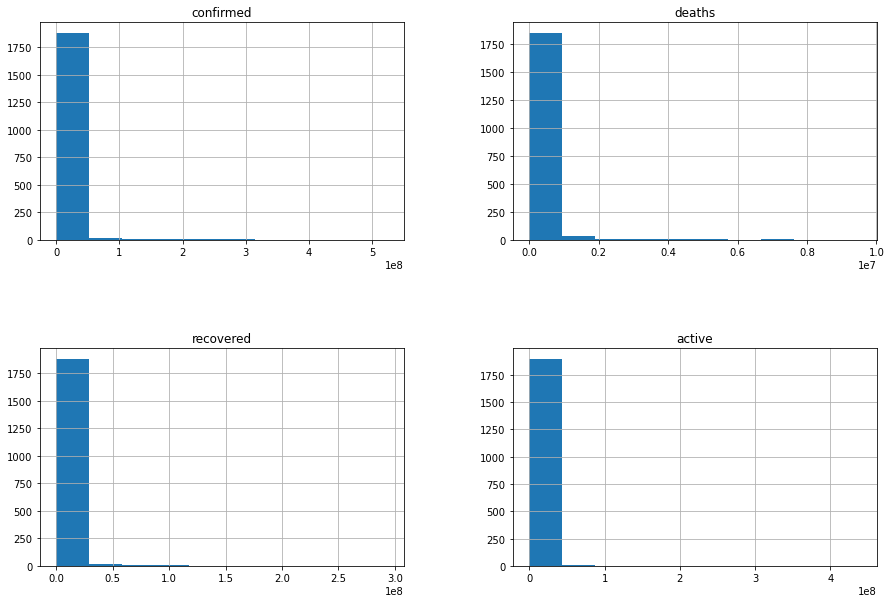

In [82]:
data_by_mo.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [32]:
#Concatonating africa data with the other countries 
covid_cases = grab_countries(covid_cases, axis=0), 0)

#Updating the date datatype
covid_cases['date'] = pd.to_datetime(covid_cases['date'],format='%Y-%m-%d')

,date,country,confirmed,deaths,recovered,active
0,2020-03-08,Bangladesh,6,0.0,0.0,6.0
1,2020-03-10,Bangladesh,9,0.0,0.0,9.0
2,2020-03-11,Bangladesh,3,0.0,0.0,3.0
3,2020-03-13,Bangladesh,3,0.0,0.0,3.0
4,2020-03-15,Bangladesh,5,0.0,0.0,5.0


In [33]:
collect_end_date = grouped_cases.date.max()
collect_start_date = grouped_cases.date.min()

print('start date:', collect_start_date, '|    end date:', collect_end_date)

start date: 2020-01-22 00:00:00 |    end date: 2020-12-31 00:00:00


There is very little overlapping time-dependent data, December 14th 2020 to December 31st 2020. There will be four cleaned files generated including data for 20 countries to conduct further analysis and identify predictive models: the first set is vaccination data(two files), the second set is covid case data(one file) and population data(one file) for the 20 countries by continent: 

    Africa: Morocco
    Asia: Indonesia, Bangladesh, United Arab Emirates, Germany, Israel, Turkey, India, China
    Europe: Poland, Spain, Italy, France, Russia, United Kingdom
    North America: USA, Canada
    South America: Mexico, Chile, Brazil

In [34]:
grouped_cases.shape

(5824, 6)

In [35]:
grouped_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       5824 non-null   datetime64[ns]
 1   country    5824 non-null   object        
 2   confirmed  5824 non-null   int64         
 3   deaths     5824 non-null   float64       
 4   recovered  5824 non-null   float64       
 5   active     5824 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 273.1+ KB


In [36]:
#Loading world population data
world_p = pd.read_csv('../raw_data/World_population(2020).csv')
world_p = world_p.rename(columns={'Country (or dependency)':'country'})
world_p

,country,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
1,Albania,2877797,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
2,Algeria,43851044,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
3,American Samoa,55191,-0.22 %,-121,276,200,NaN,N.A.,N.A.,88 %,0.00 %
4,Andorra,77265,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Wallis & Futuna,11239,-1.69 %,-193,80,140,NaN,N.A.,N.A.,0 %,0.00 %
231,Western Sahara,597339,2.55 %,14876,2,266000,5582.0,2.4,28,87 %,0.01 %
232,Yemen,29825964,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %
233,Zambia,18383955,2.93 %,522925,25,743390,-8000.0,4.7,18,45 %,0.24 %


In [37]:
world_subset = grab_countries(world_p, 0)
world_subset

,country,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Canada,37742154,0.89 %,331107,4,9093510,242032.0,1.5,41,81 %,0.48 %
1,Mexico,128932753,1.06 %,1357224,66,1943950,-60000.0,2.1,29,84 %,1.65 %
2,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
3,Bangladesh,164689383,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %
4,Morocco,36910560,1.20 %,438791,83,446300,-51419.0,2.4,30,64 %,0.47 %
5,Poland,37846611,-0.11 %,-41157,124,306230,-29395.0,1.4,42,60 %,0.49 %
6,Chile,19116201,0.87 %,164163,26,743532,111708.0,1.7,35,85 %,0.25 %
7,Spain,46754778,0.04 %,18002,94,498800,40000.0,1.3,45,80 %,0.60 %
8,Italy,60461826,-0.15 %,-88249,206,294140,148943.0,1.3,47,69 %,0.78 %
9,France,65273511,0.22 %,143783,119,547557,36527.0,1.9,42,82 %,0.84 %


## 2.12 Save data<a id='2.12_Save_data'></a>

In [38]:
# save the data to a new csv file
datapath = '../data'
save_file(sorted_vdf, 'vaccine_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.


In [39]:
# save the vaccine_summary separately.
save_file(vcount_df, 'vaccine_summary.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.


In [40]:
# save the vaccine_summary separately.
save_file(grouped_cases, 'covid_cases_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.


In [41]:
# save the world_subset_population separately.
save_file(world_subset, 'world_subset_population.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.


## 2.13 Summary<a id='2.13_Summary'></a>

Unfortunately we cannot derive the individual vaccine count based on daily vaccinations for all countries. We can identify countries where only one vaccination was given and this would be an accurate representation for the vaccine distribution in that country when paired with the total number of vaccines distributed per country. Will have to think about some other things to say about the ratios of vaccines for the other countries. Will have to identify which countries those are in the EDA.